# Regresión Lineal Multiple

In [38]:
# Se importan las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


## Descripción del Dataset

### `Real_estate.csv`:

El conjunto de datos proporciona información sobre precios de viviendas y características asociadas. Los datos fueron descargados de [Kaggle](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download) y se utilizan para predecir el precio de las casas.

El dataset contiene las siguientes columnas:

- `transaction_date`: Fecha de la transacción (por ejemplo, 2012.917)
- `house_age`: Edad de la casa en años (por ejemplo, 32.0)
- `distance_to_nearest_MRT_station`: Distancia a la estación de MRT más cercana en metros (por ejemplo, 84.87882)
- `number_of_convenience_stores`: Número de tiendas de conveniencia en el área (por ejemplo, 10)
- `latitude`: Latitud de la ubicación (por ejemplo, 24.98298)
- `longitude`: Longitud de la ubicación (por ejemplo, 121.54024)
- `house_price`: Precio de la casa por unidad de área (por ejemplo, 37.9)




In [39]:
# Se importa el archivo
df = pd.read_csv('Real_estate.csv')
# visualizamos el df
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [40]:
# Eliminar la columna idex
df.drop(columns='No', axis=1, inplace=True)
# Renombrar las columnas
df.columns = ['transaction_date', 'house_age', 'distance_to_nearest_MRT_station',
              'number_of_convenience_stores', 'latitude', 'longitude', 'house_price']

 Para entender mejor los datos realizamos una EDA

In [41]:
# Generamos estadísticas descriptivas para todas las columnas, incluyendo datos de tipo objeto.
df.describe(include='all')

,transaction_date,house_age,distance_to_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [42]:
# Verificamos el tipo de dato en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   transaction_date                 414 non-null    float64
 1   house_age                        414 non-null    float64
 2   distance_to_nearest_MRT_station  414 non-null    float64
 3   number_of_convenience_stores     414 non-null    int64  
 4   latitude                         414 non-null    float64
 5   longitude                        414 non-null    float64
 6   house_price                      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


Para comprender mejor las relaciones entre las variables en nuestro dataset, calculamos la matriz de correlación. Esta matriz nos permite visualizar las correlaciones entre cada par de variables, lo que nos ayuda a identificar posibles patrones y relaciones que pueden ser útiles en nuestro análisis.

<Axes: >

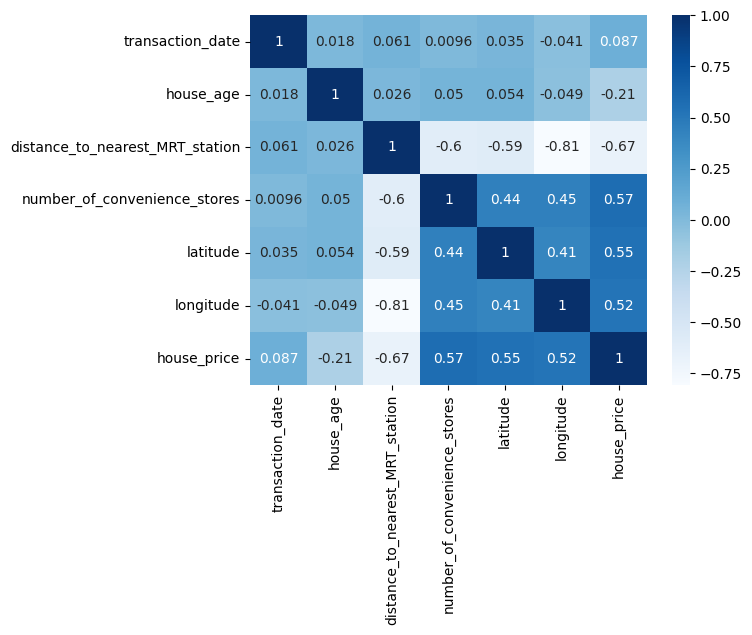

In [43]:
# Identificamos correlaciones entre las variables 
sns.heatmap(df.corr(), annot=True,cmap='Blues')

Aquí hay algunas observaciones que se pueden hacer sobre este resultado:

- transaction_date: Tiene una correlación positiva muy baja con el precio de la casa (0.087491), lo que sugiere que la fecha de transacción no tiene una influencia significativa en el precio de la casa.
- house_age: Tiene una correlación negativa moderada con el precio de la casa (-0.210567), lo que indica que a medida que la edad de la casa aumenta, el precio tiende a disminuir.
- distance_to_nearest_MRT_station: Tiene una correlación negativa fuerte con el precio de la casa (-0.673613), lo que sugiere que a medida que la distancia a la estación de MRT más cercana aumenta, el precio tiende a disminuir.
- number_of_convenience_stores: Tiene una correlación positiva moderada con el precio de la casa (0.571005), lo que indica que un mayor número de tiendas de conveniencia en el área está asociado con precios más altos de las casas.
- latitude y longitude: Tienen correlaciones moderadas con el precio de la casa (0.546307 y 0.523287 respectivamente), lo que sugiere que la ubicación geográfica también puede influir en el precio de la casa.

Este análisis de correlación sugiere que la edad de la casa, la distancia a la estación de MRT más cercana, el número de tiendas de conveniencia en el área y la ubicación geográfica son variables importantes a considerar al predecir el precio de una casa.

# Modelo de Regresión

In [44]:
# Seleccionamos las variables independientes (X) y la variable dependiente (y)
X = df.drop('house_price', axis=1)
y = df['house_price']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

# Instanciamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
print(f"Error cuadrático medio: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R2): {metrics.r2_score(y_test, y_pred)}")


Error cuadrático medio: 69.50825046591002
Coeficiente de determinación (R2): 0.5941247122615982


In [47]:
# Visualizamos los coheficientes
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
transaction_date,6.142954
house_age,-0.268205
distance_to_nearest_MRT_station,-0.004159
number_of_convenience_stores,1.117129
latitude,225.982451
longitude,-2.517430


- Un MSE de 69.51 indica que, en promedio, las predicciones del modelo difieren en aproximadamente 69.51 unidades al cuadrado del valor real del precio de la casa por unidad de área. Un MSE más bajo indica un mejor ajuste del modelo.

- Un R2 de 0.5941 significa que aproximadamente el 59.41% de la variabilidad en el precio de la casa puede explicarse por las variables incluidas en el modelo. Un R2 más cercano a 1 indica un mejor ajuste del modelo.

Estos resultados indican que el modelo de regresión lineal explica aproximadamente el 59.41% de la variabilidad en el precio de las casas, y que las predicciones del modelo tienen un error cuadrático medio de aproximadamente 69.51 unidades al cuadrado.

## Identificación de la Mejor Variable Predictora

Este código analiza un conjunto de datos para identificar la variable independiente que mejor predice una variable objetivo utilizando el coeficiente de determinación (R2) en un modelo de regresión lineal. Para cada variable independiente, se entrena un modelo de regresión lineal sin esa variable y se calcula el R2. Al final, se identifica la variable con el R2 más alto como la mejor variable predictora.


In [56]:
# Variable para almacenar los resultados de R2
r2_scores = {}

# Iterar sobre cada columna del DataFrame
for column in df.columns:
    if column != 'house_price':  # Excluir la columna de precios
        X = df.drop(column, axis=1)
        y = df[column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = metrics.r2_score(y_test, y_pred)
        r2_scores[column] = r2

# Encontrar la variable con el R2 más alto
best_predictor = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_predictor]

print(f"La mejor variable predictora es '{best_predictor}' con un R2 de {best_r2}")


La mejor variable predictora es 'distance_to_nearest_MRT_station' con un R2 de 0.8220677171860902


Según el análisis realizado, la variable "distance_to_nearest_MRT_station" (distancia a la estación de MRT más cercana) es la que mejor predice el precio de las casas en el conjunto de datos. El coeficiente de determinación (R2) asociado a esta variable es de 0.8220677171860902, lo cual sugiere que alrededor del 82.21% de la variabilidad en el precio de las casas puede ser explicada por esta variable. En términos simples, esto significa que la distancia a la estación de MRT más cercana tiene una fuerte influencia en el precio de las viviendas, y que el modelo de regresión lineal puede utilizar esta variable de forma efectiva para predecir los precios de las casas en el área estudiada.